In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
thread_char = pd.read_csv('../data/thread_character2000.csv',encoding='utf-8')


In [3]:
data = np.array(thread_char['sentiment']).reshape(-1, 1)
# for r in user_char.iterrows():
#     row = r[1]
#     d = [row['neg'],row['pos']]
#     data.append(d)

In [4]:
from sklearn.cluster import KMeans
import numpy as np

model = KMeans(n_clusters=3)
model.fit(data)
# 分类中心点坐标
centers = model.cluster_centers_
# 预测结果
result = model.predict(data)

In [6]:
thread_char['clu_result'] = result
sentiment_mean = thread_char.groupby('clu_result')['sentiment'].mean()
print(sentiment_mean)

clu_result
0    0.004442
1   -0.169636
2    0.222730
Name: sentiment, dtype: float64


In [7]:
thread_char.loc[thread_char['clu_result'] == 1,'clu_result'] = -1

In [8]:
thread_char.loc[thread_char['clu_result'] == 2,'clu_result'] = 1

In [9]:
thread_char[:10]

,thread_id,sentiment,topic,clu_result
0,6.868138e+08,-0.050000,"(0.16898956399095352, 0.029981381422936028, 0....",0
1,7.266243e+08,-0.028986,"(0.2322326619959942, 0.044607274191338496, 0.1...",0
2,7.305036e+08,-0.160000,"(0.18630630209299476, 0.15930861700179608, 0.0...",-1
3,9.008748e+08,-0.050000,"(0.2315189573528051, 0.0013847677808659577, 0....",0
4,9.157761e+08,-0.017327,"(0.06874931519761564, 0.1333018552918629, 0.00...",0
5,9.230414e+08,0.134831,"(0.281052167261216, 0.08767921800321728, 0.053...",1
6,1.233548e+09,-0.145000,"(0.20981591489266888, 0.00290429451845226, 0.0...",-1
7,1.239983e+09,0.200000,"(0.5695579439297189, 0.00038485364639194897, 0...",1
8,1.526386e+09,-0.168519,"(0.14733216552216066, 0.04017410572248606, 0.0...",-1
9,1.538466e+09,0.183333,"(0.18851802053384778, 0.16645897009253105, 0.0...",1


In [10]:
thread_char.to_csv('../data/thread_character2000.csv',encoding='utf-8',index=False)

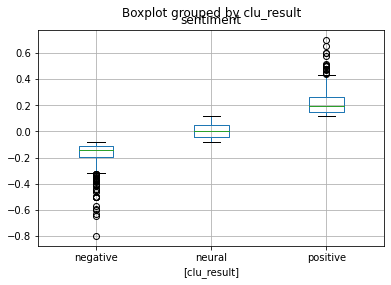

In [15]:
df = pd.DataFrame()
df['sentiment'] = thread_char['sentiment']
df['clu_result'] = thread_char['clu_result']
df.loc[df['clu_result'] == 1,'clu_result'] = 'positive'
df.loc[df['clu_result'] == 0,'clu_result'] = 'neural'
df.loc[df['clu_result'] == -1,'clu_result'] = 'negative'
boxplot=df.boxplot(by='clu_result')

In [16]:
df.groupby(by = 'clu_result').describe()


sentiment                                                    \
               count      mean       std       min       25%       50%   
clu_result                                                               
negative       613.0 -0.169636  0.090955 -0.800000 -0.194444 -0.144444   
neural        1069.0  0.004442  0.053266 -0.081967 -0.040217  0.000000   
positive       318.0  0.222730  0.105504  0.114159  0.147570  0.191667   

                                
                 75%       max  
clu_result                      
negative   -0.109211 -0.082192  
neural      0.047619  0.113793  
positive    0.262500  0.700000